In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from filo import create_bins_centered_on, resample_dataframe
%matplotlib inline

In [2]:
data_folder = Path('data/isotherm/')
pressure_file = data_folder / 'ValvePID_Pressure_resampled.tsv'
analysis_file = data_folder / 'Spectro_WLI.tsv'
pressure_file.exists()

True

In [3]:
pressure_data = pd.read_csv(pressure_file, sep='\t').set_index('time (unix)')
analysis_data = pd.read_csv(analysis_file, sep='\t').set_index('time (unix)')
analysis_data.tail()

,num,folder,filename,opl,contrast
time (unix),,,,,
1.659009e+09,22,WLI_Spectra,2106297U1_0007.Raw8.txt,13.929712,42.667708
1.659009e+09,24,WLI_Spectra,2106297U1_0008.Raw8.txt,13.928008,42.686275
1.659009e+09,26,WLI_Spectra,2106297U1_0009.Raw8.txt,13.929712,42.700220
1.659009e+09,28,WLI_Spectra,2106297U1_0010.Raw8.txt,13.928008,42.693740
1.659009e+09,30,WLI_Spectra,2106297U1_0011.Raw8.txt,13.928008,42.736708


In [4]:
create_bins_centered_on(analysis_data.index)

[(1659007970.0, 1659008030.0),
 (1659008030.0, 1659008090.0),
 (1659008090.0, 1659008150.0),
 (1659008150.0, 1659008210.0),
 (1659008210.0, 1659008270.0),
 (1659008270.0, 1659008330.0),
 (1659008570.0, 1659008630.0),
 (1659008630.0, 1659008690.0),
 (1659008690.0, 1659008750.0),
 (1659008750.0, 1659008810.0),
 (1659008810.0, 1659008870.0)]

In [21]:
df = resample_dataframe(
    dataframe=pressure_data.drop('dt (s)', axis=1),
    new_index=analysis_data.index,
    max_interval=30,
    agg=['mean', 'std']
)
df

setpt (Pa)               p (Pa)              valve           
                   mean        std      mean        std    mean        std
time (unix)                                                               
1.659008e+09    350.000   0.000000   349.290   0.721249  3458.0   0.000000
1.659008e+09    350.000   0.000000   350.205   0.021213  3458.0   0.000000
1.659008e+09    413.335  47.142809   379.265  33.142095  3495.0  26.870058
1.659008e+09    613.335  47.142809   569.975  48.033764  3590.0  19.798990
1.659008e+09    813.335  47.142809   772.860  47.871129  3673.0  18.384776
1.659008e+09   1013.335  47.142809   974.270  46.697332  3750.0  18.384776
1.659009e+09   2013.360  47.135738  1929.300  42.426407  4321.5  47.376154
1.659009e+09   2210.365  42.900168  2083.510  32.512770  4586.0  79.195959
1.659009e+09   2251.700   0.000000  2176.030  11.554125  4806.0  33.941125
1.659009e+09   2251.700   0.000000  2208.990   5.190164  4917.5  20.506097
1.659009e+09   2251.700   0.000000  2225.635   2.566798  4985.0  12.727922

In [27]:
df['p (Pa)']['mean'].iloc[-2]

2208.99

In [15]:
def check_bins_graphically(max_interval=None):

    ts = analysis_data.index
    bins = create_bins_centered_on(ts, max_interval=max_interval)

    fig, ax = plt.subplots()
    for ti in ts:
        ax.plot(ti, 0, 'ok')

    for tj in pressure_data.index:
        ax.plot(tj, 1, '.b')

    for (ta, tb) in bins:
        ax.axvline(ta, linestyle=':', c='r')
        ax.axvline(tb, linestyle=':', c='r')

    return ax

<Axes: >

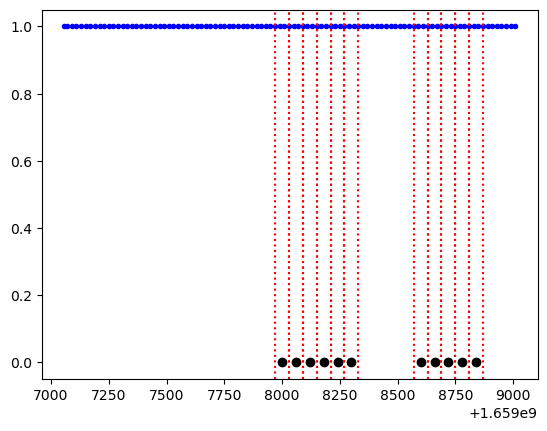

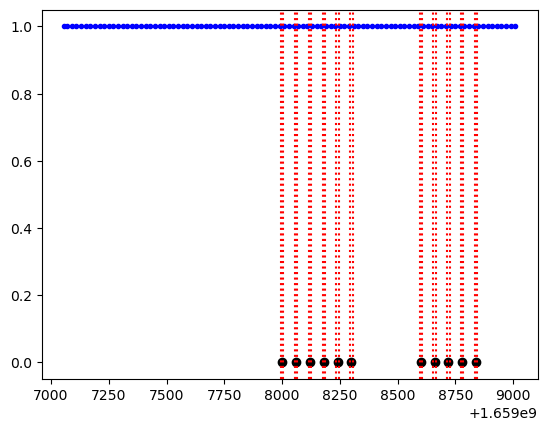

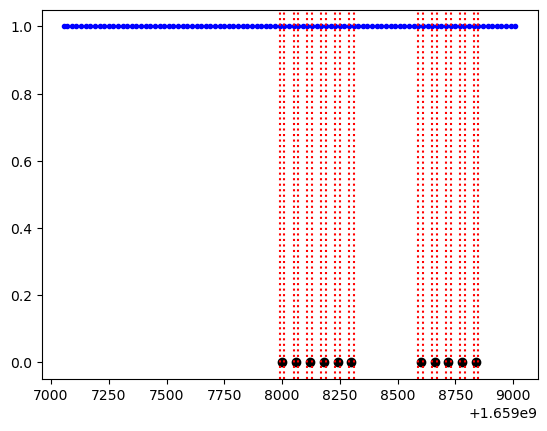

In [16]:
check_bins_graphically()
check_bins_graphically(max_interval=10)
check_bins_graphically(max_interval=20)